In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import stats

In [13]:
slamm = pd.read_csv('Data/SLAMM_Data.csv')
slamm.head()

/Users/Andrew/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,21,23,24,25,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_fla,pfirm15_fl,version,shape_leng,shape_area
0,1,MN,1,10,101,5.0,1022.0,2.0,1,10004,...,10101.0,NaN,0,NaN,1,1.0,1.0,18v2.1,12277.824113,7.550340e+06
1,2,MN,1,101,101,1.0,1001.0,2.0,1,10004,...,10101.0,NaN,0,NaN,1,NaN,1.0,18v2.1,3940.840373,5.018974e+05
2,25,MN,7,38,101,9.0,1016.0,2.0,1,10004,...,10101.0,NaN,0,NaN,1,1.0,1.0,18v2.1,168.522578,1.619162e+03
3,3,MN,1,201,101,1.0,1000.0,2.0,1,10004,...,10101.0,NaN,0,NaN,1,NaN,1.0,18v2.1,6306.268341,1.148539e+06
4,4,MN,2,1,101,9.0,1025.0,2.0,1,10004,...,10101.0,NaN,1000020001,08/07/2012,1,1.0,1.0,18v2.1,2721.060649,1.008250e+05


In [15]:
ct = pd.read_csv('Data/CensusTract.csv')
ct.head()

,id,objectid,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,...,geoid_data,population,housing_units,poverty_population,median_income,while_alone_population,population_5_years_and_over,language_only_english_5_years_and_over,total_household,household_received_food_stamps
0,1,4,36,81,3400,36081003400,34.0,Census Tract 34,G5020,S,...,14000US36081003400,318,90,420,67292,785,2471,1137,660,151
1,2,5,36,81,3900,36081003900,39.0,Census Tract 39,G5020,S,...,14000US36081003900,193,65,504,41477,869,1510,510,475,104
2,3,6,36,81,3600,36081003600,36.0,Census Tract 36,G5020,S,...,14000US36081003600,275,81,282,77005,985,3527,1373,947,152
3,4,7,36,81,3700,36081003700,37.0,Census Tract 37,G5020,S,...,14000US36081003700,0,0,0,0,0,0,0,0,0
4,5,8,36,81,3800,36081003800,38.0,Census Tract 38,G5020,S,...,14000US36081003800,295,95,430,57614,998,2356,1003,746,180


In [34]:
ct = ct[ct['median_income'] > 0]

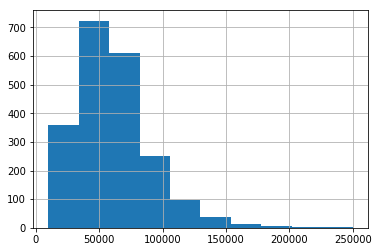

In [35]:
ct.median_income.hist()

In [36]:
sum(ct.population > ct.while_alone_population)/len(ct)

0.1355206847360913

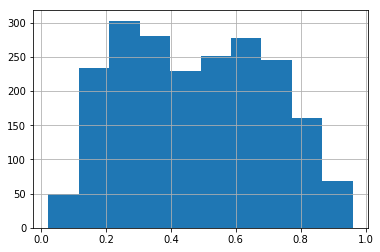

In [37]:
ct['percent_not_onlyenglish'] = (ct['population_5_years_and_over'] - ct['language_only_english_5_years_and_over'])/ct['population_5_years_and_over'] 

ct.percent_not_onlyenglish.hist()

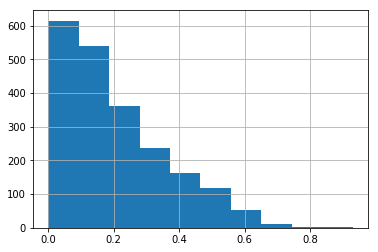

In [38]:
ct['percent_household_received_foodstamps'] = ct['household_received_food_stamps']/ct['total_household']
ct.percent_household_received_foodstamps.hist()

In [27]:
slamm_cts = slamm.ct2010.unique()
slamm_cts = set([x for x in slamm_cts if str(x) != 'nan'])

In [30]:
ct['is_slamm'] = ct.name.apply(lambda x: 1 if x in slamm_cts else 0)

In [31]:
ct.is_slamm.value_counts()

0    1346
1     821
Name: name, dtype: int64

In [39]:
ct.head()

,id,objectid,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,...,poverty_population,median_income,while_alone_population,population_5_years_and_over,language_only_english_5_years_and_over,total_household,household_received_food_stamps,is_slamm,percent_not_onlyenglish,percent_household_received_foodstamps
0,1,4,36,81,3400,36081003400,34.00,Census Tract 34,G5020,S,...,420,67292,785,2471,1137,660,151,1,0.539862,0.228788
1,2,5,36,81,3900,36081003900,39.00,Census Tract 39,G5020,S,...,504,41477,869,1510,510,475,104,1,0.662252,0.218947
2,3,6,36,81,3600,36081003600,36.00,Census Tract 36,G5020,S,...,282,77005,985,3527,1373,947,152,0,0.610717,0.160507
4,5,8,36,81,3800,36081003800,38.00,Census Tract 38,G5020,S,...,430,57614,998,2356,1003,746,180,1,0.574278,0.241287
5,6,9,36,81,4001,36081004001,40.01,Census Tract 40.01,G5020,S,...,350,56607,799,2136,712,653,149,0,0.666667,0.228178


# Two sample t-test
alpha = 0.05

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [44]:
#median_income
stats.ttest_ind(ct[ct['is_slamm'] == 0]['median_income'], ct[ct['is_slamm'] == 1]['median_income'])
#reject null hypothesis



Ttest_indResult(statistic=-4.542248259301712, pvalue=5.881162769647609e-06)

In [45]:
#percent_not_onlyenglish
stats.ttest_ind(ct[ct['is_slamm'] == 0]['percent_not_onlyenglish'], ct[ct['is_slamm'] == 1]['percent_not_onlyenglish'])
#reject null hypothesis



Ttest_indResult(statistic=3.3657254726472052, pvalue=0.0007771648246769853)

In [46]:
#percent_household_received_foodstamps
stats.ttest_ind(ct[ct['is_slamm'] == 0]['percent_household_received_foodstamps'], ct[ct['is_slamm'] == 1]['percent_household_received_foodstamps'])
#fail to reject null hypothesis



Ttest_indResult(statistic=1.1942467675058976, pvalue=0.23251626405905831)

Text(0, 0.5, 'Counts')

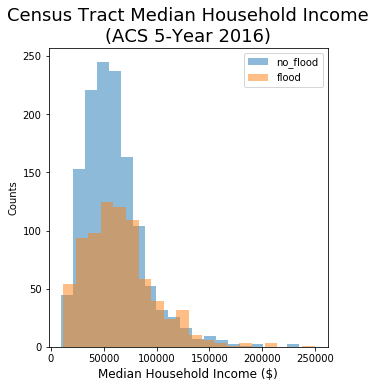

In [61]:
plt.figure(figsize=(5,5.5))
bins = 20
plt.hist(ct[ct['is_slamm'] == 0]['median_income'], bins=bins, alpha = 0.5, label='no_flood')
plt.hist(ct[ct['is_slamm'] == 1]['median_income'], bins=bins, alpha = 0.5, label='flood')
plt.legend(loc='upper right')
plt.title('Census Tract Median Household Income\n(ACS 5-Year 2016)', fontsize=18)
plt.xlabel('Median Household Income ($)', fontsize=12)
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

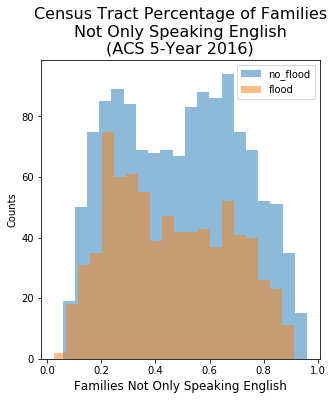

In [72]:
plt.figure(figsize=(5,5.5))
bins = 20
plt.hist(ct[ct['is_slamm'] == 0]['percent_not_onlyenglish'], bins=bins, alpha = 0.5, label='no_flood')
plt.hist(ct[ct['is_slamm'] == 1]['percent_not_onlyenglish'], bins=bins, alpha = 0.5, label='flood')
plt.legend(loc='upper right')
plt.title('Census Tract Percentage of Families\nNot Only Speaking English\n(ACS 5-Year 2016)', fontsize=16)
plt.xlabel('Families Not Only Speaking English', fontsize=12)
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

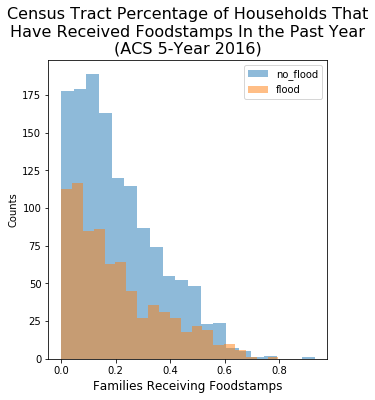

In [65]:
plt.figure(figsize=(5,5.5))
bins = 20
plt.hist(ct[ct['is_slamm'] == 0]['percent_household_received_foodstamps'], bins=bins, alpha = 0.5, label='no_flood')
plt.hist(ct[ct['is_slamm'] == 1]['percent_household_received_foodstamps'], bins=bins, alpha = 0.5, label='flood')
plt.legend(loc='upper right')
plt.title('Census Tract Percentage of Households That\nHave Received Foodstamps In the Past Year\n(ACS 5-Year 2016)', fontsize=16)
plt.xlabel('Families Receiving Foodstamps', fontsize=12)
plt.ylabel('Counts')

In [71]:
ct[ct['is_slamm'] == 0]['median_income'].median()

54583.0

In [70]:
ct[ct['is_slamm'] == 1]['median_income'].median()

60408.5

In [73]:
ct[ct['is_slamm'] == 0]['percent_not_onlyenglish'].mean()

0.4907092939505639

In [74]:
ct[ct['is_slamm'] == 1]['percent_not_onlyenglish'].mean()

0.4569109403513959

In [77]:
ct[ct['is_slamm'] == 0]['percent_household_received_foodstamps'].median()

0.17149643705463183

In [78]:
ct[ct['is_slamm'] == 1]['percent_household_received_foodstamps'].median()

0.15238432483474976